In [12]:
import pandas as pd
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv('data_treated.csv')
df

,Run,Wcat [g],Temp [degC],VolF [mL/min],molF [mmol/min],xNH3,xN2,xH2,Conv,molF_NH3,...,xNH3_cal,xN2_cal,xH2_cal,Fin [mmol/min],Fout [mmol/min],Vin [mL/min],Vout [mL/min],Vavg [mL/min],Vcat [mL],rt [min]
0,0,0.3,300,30,1.226182,0.925,0.019,0.056,0.038961,1.178409,...,0.925,0.01875,0.05625,1.226182,1.273955,57.670636,59.917543,58.786933,0.402685,0.005586
1,1,0.3,300,60,2.452364,0.948,0.013,0.039,0.026694,2.386900,...,0.948,0.01300,0.03900,2.452364,2.517827,115.341271,118.420196,116.873975,0.402685,0.002793
2,2,0.3,300,90,3.678546,0.951,0.012,0.036,0.025115,3.586158,...,0.951,0.01225,0.03675,3.678546,3.770934,173.011907,177.357157,175.175550,0.402685,0.001862
3,3,0.3,350,30,1.226182,0.795,0.051,0.154,0.114206,1.086144,...,0.795,0.05125,0.15375,1.226182,1.366219,62.701660,69.862574,66.217597,0.402685,0.005138
4,4,0.3,350,60,2.452364,0.843,0.039,0.118,0.085187,2.243454,...,0.843,0.03925,0.11775,2.452364,2.661274,125.403320,136.086078,130.671929,0.402685,0.002569
5,5,0.3,350,90,3.678546,0.875,0.031,0.094,0.066667,3.433310,...,0.875,0.03125,0.09375,3.678546,3.923782,188.104981,200.645313,194.307707,0.402685,0.001713
6,6,0.3,400,30,1.226182,0.514,0.122,0.365,0.321004,0.832573,...,0.514,0.12150,0.36450,1.226182,1.619791,67.732685,89.475145,78.100155,0.402685,0.004756
7,7,0.3,400,60,2.452364,0.647,0.088,0.265,0.214329,1.926751,...,0.647,0.08825,0.26475,2.452364,2.977977,135.465370,164.499538,149.512899,0.402685,0.002378
8,8,0.3,400,90,3.678546,0.713,0.072,0.216,0.167542,3.062234,...,0.713,0.07175,0.21525,3.678546,4.294858,203.198055,237.242329,219.780910,0.402685,0.001585
9,9,0.3,450,30,1.226182,0.202,0.200,0.599,0.663894,0.412128,...,0.202,0.19950,0.59850,1.226182,2.040236,72.763710,121.071064,94.876506,0.402685,0.004427


In [14]:
df_rx = pd.DataFrame()
df_rx['T'] = df['Temp [degC]'] + 273.15
df_rx['F0 [mmol/min]'] = df['Fin [mmol/min]']
df_rx['RT [min]'] = df['rt [min]']
df_rx['nNH3'] = df['molF_NH3']
df_rx['nN2'] = df['molF_N2']
df_rx['nH2'] = df['molF_H2']
df_rx

,T,F0 [mmol/min],RT [min],nNH3,nN2,nH2
0,573.15,1.226182,0.005586,1.178409,0.023887,0.071660
1,573.15,2.452364,0.002793,2.386900,0.032732,0.098195
2,573.15,3.678546,0.001862,3.586158,0.046194,0.138582
3,623.15,1.226182,0.005138,1.086144,0.070019,0.210056
4,623.15,2.452364,0.002569,2.243454,0.104455,0.313365
5,623.15,3.678546,0.001713,3.433310,0.122618,0.367855
6,673.15,1.226182,0.004756,0.832573,0.196805,0.590414
7,673.15,2.452364,0.002378,1.926751,0.262806,0.788419
8,673.15,3.678546,0.001585,3.062234,0.308156,0.924468
9,723.15,1.226182,0.004427,0.412128,0.407027,1.221081


In [15]:
kp = np.load('best_k0.npy')
E = np.load('best_E.npy')

print(kp)
print(E)

[413.21779168   0.54492368]
[162993.86401298]


In [16]:
class NH3_decomposition:
    def __init__(self, data_df, kp, E):
        self.data = data_df.copy()
        self.T = self.data['T'].values
        self.P = 1 # atm\
        self.RT = self.data['RT [min]'].values
        self.F0 = self.data['F0 [mmol/min]'].values

        self.res_exp = self.data[['nNH3','nN2','nH2']].values
        self.kp = kp
        self.E = E
    
    def partial_pressure(self, N, N0):
        nNH3 = N
        nN2 = 0.5*(N0-N)
        nH2 = 1.5*(N0-N)
        pNH3 = self.P*nNH3/(nNH3+nN2+nH2)
        pN2 = self.P*nN2/(nNH3+nN2+nH2)
        pH2 = self.P*nH2/(nNH3+nN2+nH2)

        return np.array([pNH3, pN2, pH2])

    def rate_equation(self, N, k, N0, T):

        p = self.partial_pressure(N, N0)+1e-6
        Keq = -0.36456 + 0.000371 * (T - 273.15) + 91.85171/(T - 273.15)
        r = k[0]*((p[0]**2/(p[2]**3))**k[1] - (p[1]*Keq**2*(p[2]**3/p[0]**2)**(1-k[1])))
        return r

    def ode(self, t, y, k, N0, T):
        N = y[0]

        rNH3 = self.rate_equation(N, k, N0, T)

        dNH3dt = -rNH3*0.3

        return [dNH3dt]

    def solve_ode(self, k, N0, tend, T):
        N0 = [N0]
        t_span = (0, tend)
        sol = solve_ivp(
            fun = lambda t, y: self.ode(t, y, k, N0, T),
            t_span = t_span,
            y0 = N0,
            t_eval = [tend],
            method = 'LSODA',
            rtol = 1e-5,
            atol = 1e-5
        )
        return sol.y[0]

    def kinetic_test(self):
        res_sim = []
        for i in range(len(self.RT)):
            print(f'{i+1} / {len(self.RT)}, condition: {self.T[i]} K, {self.F0[i]}, {self.RT[i]}'  )
            k = np.zeros(4)
            k[0] = self.kp[0]*np.exp(-(self.E[0])/8.314*(1/self.T[i]-1/(450+273.15)))
            k[1] = kp[1]
            N0 = self.F0[i]
            tend = self.RT[i]
            T = self.T[i]
            N_pred = self.solve_ode(k, N0, tend, T)

            nNH3_pred = N_pred[0]
            nN2_pred = 0.5*(N0-nNH3_pred)
            nH2_pred = 1.5*(N0-nNH3_pred)

            res_sim.append([nNH3_pred, nN2_pred, nH2_pred])

        return np.array(res_sim)


In [17]:
test = NH3_decomposition(df_rx, kp, E)

res_sim = test.kinetic_test()

1 / 18, condition: 573.15 K, 1.2261819770950029, 0.0055859909940766
2 / 18, condition: 573.15 K, 2.4523639541900053, 0.0027929954970383
3 / 18, condition: 573.15 K, 3.678545931285008, 0.0018619969980255
4 / 18, condition: 623.15 K, 1.2261819770950029, 0.0051377850248817
5 / 18, condition: 623.15 K, 2.4523639541900053, 0.0025688925124408
6 / 18, condition: 623.15 K, 3.678545931285008, 0.0017125950082939
7 / 18, condition: 673.15 K, 1.2261819770950029, 0.0047561624277724
8 / 18, condition: 673.15 K, 2.4523639541900053, 0.0023780812138862
9 / 18, condition: 673.15 K, 3.678545931285008, 0.0015853874759241
10 / 18, condition: 723.15 K, 1.2261819770950029, 0.0044273120905137
11 / 18, condition: 723.15 K, 2.4523639541900053, 0.0022136560452568
12 / 18, condition: 723.15 K, 3.678545931285008, 0.0014757706968379
13 / 18, condition: 773.15 K, 1.2261819770950029, 0.0041409955872146
14 / 18, condition: 773.15 K, 2.4523639541900053, 0.0020704977936073
15 / 18, condition: 773.15 K, 3.678545931285008

In [18]:
res_sim

array([[1.15187688, 0.03715255, 0.11145765],
       [2.36417696, 0.0440935 , 0.1322805 ],
       [3.58114309, 0.04870142, 0.14610427],
       [1.02616692, 0.10000753, 0.30002259],
       [2.21289335, 0.1197353 , 0.35920591],
       [3.4132771 , 0.13263441, 0.39790324],
       [0.7787935 , 0.22369424, 0.67108272],
       [1.90273335, 0.2748153 , 0.82444591],
       [3.06459209, 0.30697692, 0.92093076],
       [0.40850829, 0.40883685, 1.22651054],
       [1.37504593, 0.53865901, 1.61597704],
       [2.44880643, 0.61486975, 1.84460924],
       [0.083131  , 0.57152549, 1.71457646],
       [0.68548253, 0.88344071, 2.65032213],
       [1.55444951, 1.06204821, 3.18614463],
       [0.00528291, 0.61044954, 1.83134861],
       [0.14353684, 1.15441356, 3.46324067],
       [0.60816101, 1.53519246, 4.60557739]])

In [19]:
test.res_exp

array([[1.17840865e+00, 2.38866619e-02, 7.16599857e-02],
       [2.38690044e+00, 3.27317571e-02, 9.81952713e-02],
       [3.58615805e+00, 4.61939392e-02, 1.38581818e-01],
       [1.08614448e+00, 7.00187480e-02, 2.10056244e-01],
       [2.24345395e+00, 1.04455003e-01, 3.13365009e-01],
       [3.43330954e+00, 1.22618198e-01, 3.67854593e-01],
       [8.32572703e-01, 1.96804637e-01, 5.90413911e-01],
       [1.92675104e+00, 2.62806459e-01, 7.88419377e-01],
       [3.06223380e+00, 3.08156066e-01, 9.24468198e-01],
       [4.12127719e-01, 4.07027129e-01, 1.22108139e+00],
       [1.36851456e+00, 5.41924695e-01, 1.62577408e+00],
       [2.45236395e+00, 6.13090989e-01, 1.83927297e+00],
       [5.74772802e-02, 5.84352348e-01, 1.75305705e+00],
       [6.39747118e-01, 9.06308418e-01, 2.71892525e+00],
       [1.59586096e+00, 1.04134249e+00, 3.12402746e+00],
       [2.44991404e-03, 6.11866032e-01, 1.83559809e+00],
       [9.61711355e-02, 1.17809641e+00, 3.53428923e+00],
       [6.68826533e-01, 1.50485

In [20]:
import pandas as pd

# res_sim과 test.res_exp를 각각 nNH3, nN2, nH2로 분리
sim_nNH3 = res_sim[:, 0]
sim_nN2 = res_sim[:, 1]
sim_nH2 = res_sim[:, 2]

exp_nNH3 = test.res_exp[:, 0]
exp_nN2 = test.res_exp[:, 1]
exp_nH2 = test.res_exp[:, 2]

# DataFrame 생성
df_compare = pd.DataFrame({
    'sim_nNH3': sim_nNH3,
    'exp_nNH3': exp_nNH3,
    'sim_nN2': sim_nN2,
    'exp_nN2': exp_nN2,
    'sim_nH2': sim_nH2,
    'exp_nH2': exp_nH2
})

df_compare.to_csv('df_compare.csv', index=False)


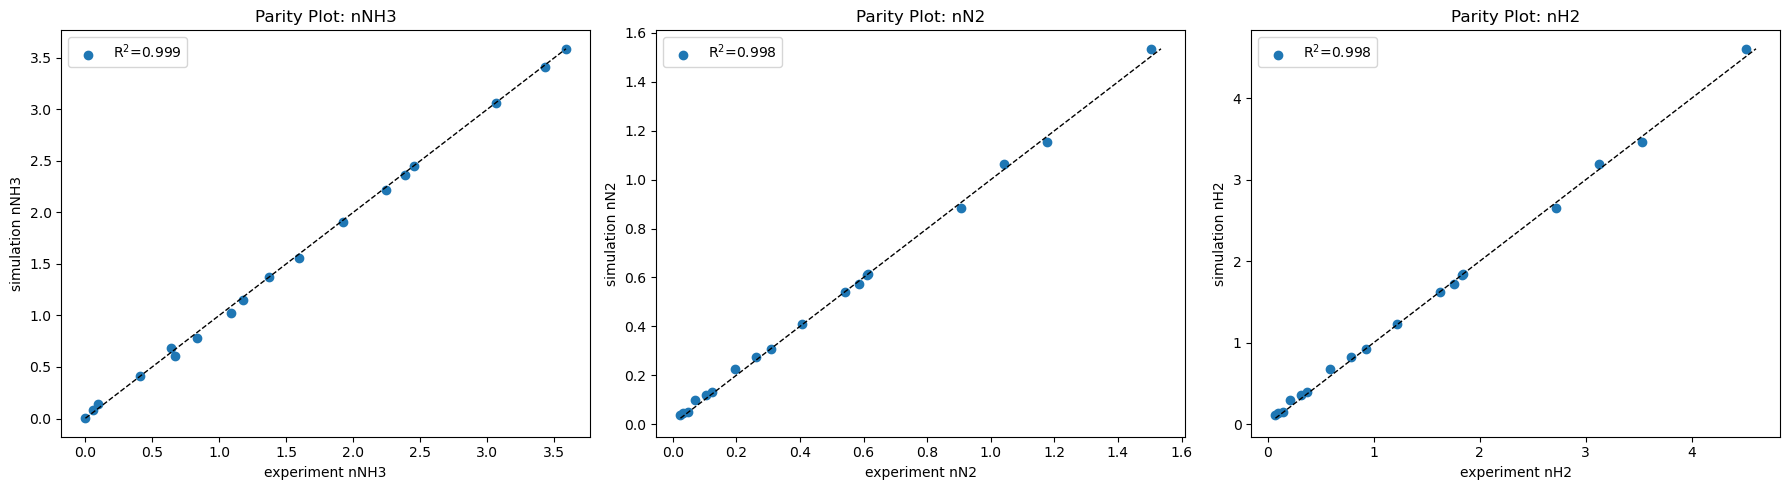

nNH3의 R2 score: 0.9991
nN2의 R2 score: 0.9985
nH2의 R2 score: 0.9985


In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# 각 성분별로 parity plot 및 r2 score 계산
components = ['nNH3', 'nN2', 'nH2']
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, comp in enumerate(components):
    sim = df_compare[f'sim_{comp}']
    exp = df_compare[f'exp_{comp}']
    r2 = r2_score(exp, sim)
    
    ax = axes[i]
    ax.scatter(exp, sim, label=f'R$^2$={r2:.3f}')
    min_val = min(exp.min(), sim.min())
    max_val = max(exp.max(), sim.max())
    ax.plot([min_val, max_val], [min_val, max_val], 'k--', lw=1)
    ax.set_xlabel(f'experiment {comp}')
    ax.set_ylabel(f'simulation {comp}')
    ax.set_title(f'Parity Plot: {comp}')
    ax.legend()

plt.tight_layout()
plt.show()

# r2 score 출력
for comp in components:
    sim = df_compare[f'sim_{comp}']
    exp = df_compare[f'exp_{comp}']
    r2 = r2_score(exp, sim)
    print(f"{comp}의 R2 score: {r2:.4f}")


In [22]:
10**E

/tmp/ipykernel_21639/3580139452.py:1: RuntimeWarning: overflow encountered in power
  10**E


array([inf])